In [2]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 패키지 가져오기
from scipy.stats import shapiro

## p.25[실습] 기술통계 분석
 자동차 연비 Data Set에서 기술통계치 구하기
  - 시내에서 연비(mpg) 통계치 구하기:모델별 데이터 수, 평균, 중앙값, 표준편차 min, max, Q1, Q3

In [7]:
# p.25 데이터 구성하기 : mycars 데이터 가져오기(데이터의 경로 확인)

# 파일명, 변수, 값 등에 한글 포함시 engine = "python" 지정
ds_mycars = pd.read_csv('./../data/mycars.csv', engine='python')
# 자동차 모델별, mpg 데이터 subset
df1 = ds_mycars[['model', 'mpg']]
# 모델 별 데이터 수 평균 표준편차
df1.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

 - 고속도로에서 연비(mpg) 통계치 구하기: 구동 방식별 데이터 수, 평균, 중앙값, 표준편차

In [8]:
# 자동차 구동방식별 고속도로 연비
df2 = ds_mycars[['driving','highway_mileage']]
# 구동방식별 데이터 수 평균, 표준편차
df2.groupby('driving').describe()


highway_mileage                                                   
                  count       mean       std   min   25%   50%   75%   max
driving                                                                   
4                 103.0  19.174757  4.078704  12.0  17.0  18.0  22.0  28.0
f                 106.0  28.160377  4.206881  17.0  26.0  28.0  29.0  44.0
r                  25.0  21.000000  3.662877  15.0  17.0  21.0  24.0  26.0

## p.105 [연습] 정규성검정
- 1. 실습파일 2sample_t_test.csv을 불러온다.
- 2. 변수, Mat_A와 Mat_B에 대해 각각 정규성을 검정합니다.

In [12]:
t_test = pd.read_csv('./../data/2sample_t_test.csv', engine='python')
t_test.head()

,Mat_A,Mat_B,Total,Sub
0,73.4,68.7,73.4,1
1,77.0,71.4,77.0,1
2,73.7,69.8,73.7,1
3,73.3,75.3,73.3,1
4,73.1,71.3,73.1,1


In [13]:
data1 = t_test['Mat_A']

shapiro(data1)



(0.9062636494636536, 0.2562994360923767)

 - p-value가 0.05보다 크므로 귀무가설이 옳다고 할 수 없다.

In [14]:
data2 = t_test['Mat_B']

shapiro(data2)

(0.9729753732681274, 0.9169777035713196)

 - p-value가 0.05보다 크므로 정규로 판단하며 귀무가설이 옳다고 할 수 없다.


## p.108[실습] 모평균 추정(모표준편차 아는 경우)
 - 새로운 품종의 감자 20Box를 랜덤추출하여 무게를 측정할 결과가 다음과 같음
 - (단, 모표준편차는 3.8로 알려져있음.)
 - 이 자료로부터 신품종 배추의 평균 무게에 대한 95% 신뢰구간을 구하시오.

In [23]:
df = pd.DataFrame({'sample':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]})
df.head()

# tmp = [18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]
# print(sum(tmp)/len(tmp))

,sample
0,18
1,18
2,20
3,21
4,20


In [19]:
# 정규분포 구간 추정 함수 실행
lower, upper = stats.norm.interval(0.95, loc=np.mean(df), scale = 3.8/np.sqrt(20))
print('신뢰구간: ({0}, {1})'.format(lower.round(2), upper.round(2)))

신뢰구간: ([17.83], [21.17])


 - 평균은 19.5 이고 Z(0.95)에 해당되는 1.96*(3.8/sqrt(40)) 을 곱해 신뢰구간을 구한다.

## p.111[실습] 모평균 추정(모표준편차 모르는 경우)
 - 제품개발자는 새로 개발된 강종의 평균 인장강도를 70kg/mm^2으로 기대하고 있음.
 - 이를 검증하기 위해 시험 생산되는 강종 중 임의로 20개의 코일을 대상으로 랜덤하게 시편을 채취하였음.
 - 상기 자료로부터 표본평균은 71.50kg/mm^2, 표본표준편차는 1.933kg/mm^2 임을 알았음.
 - 모평균값의 95% 신뢰구간을 추정하시오.

In [24]:
# df를 직접 입력
df = pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,
                             70,72,73,70,70,72,71,70,75,72]})

# 정규분포 구간 추정 함수 실행
lower, upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale = scipy.stats.sem(df))
print('신뢰구간: {0}, {1}'.format(lower.round(2), upper.round(2)))

신뢰구간: [70.6], [72.4]


 - 모표준편차를 모르는 경우 자유도를 데이터수-1(n-1)을 하여 계산한다.
 - 평균 71.5에 t분포도에 따라 (0.025, 19) = 2.093 을 구하고
 - 표본표준편차 / sqrt(n)을 곱하여 신뢰구간을 구한다.

## p.114-5[실습] 모분산 신뢰구간 추정
- 다음 상황에 대하여 모수의 신뢰구간을 계산한다.
- 날아라 항공사의 콜센터 성능을 평가하기 위해 50번의 전화를 랜덤한 시각에 걸어 상담원과 상담하기까지의 통화대기시간을 기록하였다. 고객들은 통화대기시간이 15초를 넘길 경우 짜증을 내기 시작하므로 15초를 초과한 통화대기는 통화관리 실패로 규정하고 있다. 통화대기시간의 모분산에 대한 점추정량 및 95% 신뢰구간을 구하시오.

In [91]:
ppf1 = stats.chi2.ppf(0.025, 49)
ppf2 = stats.chi2.ppf(0.975, 49)
print(ppf1)
print(ppf2)

31.554916462667126
70.22241356643451


In [105]:
wait_time = pd.DataFrame([12,9,10,5,16,
             13,5,9,8,13,
             16,12,12,4,14,
             9,11,14,9,17,
             5,8,9,6,11
             ,19,6,6,8,9,
             13,10,8,13,19,
             8,12,14,16,16,
             11,17,5,9,12,
             17,11,8,5,8])

mean = wait_time[0].mean()
std = wait_time[0].std()
print('평균 :', mean)
print('표본표준편차 :', std)

#(n-1)*S^2
tmp = 49*(std**2)
print(tmp)
print('모분산의 95% 신뢰구간 ({0:.3f}, {1:.3f})'.format((tmp/ppf2), (tmp/ppf1)))

평균 : 10.74
표본표준편차 : 3.98369124285095
777.62
모분산의 95% 신뢰구간 (11.074, 24.643)


 - 모수가 존재하리라고 생각되는 신뢰구간을 구하기 위해 자유도*분산/카이제곱표의 값을 이용한다.
 - 분산은 표본표준편차의 제곱으로 평균을 구하여 실제 값 - 평균의 제곱의 합을 구한뒤 자유도로 나누는 것으로 구할 수 있다.

## p.118[실습] 모비율 신뢰구간 추정


In [110]:
n = 50 # 고객들 수
x = 9 # 15초를 넘긴 통화
p_hat = x/n

z = stats.norm.ppf(0.975)
print(z)


1.959963984540054


In [113]:
left = p_hat - z*np.sqrt(p_hat*(1-p_hat)/n)
right = p_hat + z*np.sqrt(p_hat*(1-p_hat)/n)

print('통화관리 성공율에 대한 95% 신뢰구간 = ( {0:.3f}, {1:.3f} )'.format(left, right))

통화관리 성공율에 대한 95% 신뢰구간 = ( 0.074, 0.286 )


- 모비율 신뢰구간을 구하기 위해 전체 경우중에 실패를 전체(n)로 나눈 p_hat으로 구하고 Z 표를 확인하여 구한다. 
- 이를 통하여 모수가 존재하리라고 생각되는 신뢰구간을 구함.


## p.140[실습] 평균 검정(모집단 표준편차를 모르는 경우)
 - 고객서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가?(알파 = 0.05)
 

In [53]:
# df를 직접 이력
df = pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]})

# 1-Sample t-test
t_result = stats.ttest_1samp(df, 78.0)

# 1-Sample t-test t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test t값 p값 출력
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value : {}".format(p))

1-Sample t-test
t 통계량 : [3.379]
p-value : [0.008]


유의수준 5%에서 검정결과 P값이 0.008 이므로 개선활동이 고객만족도 변화를 시켰다고 할 수 있다. 대립가설이 통한다고 할 수 있음.

## p.148 [실습] 2-Sample t-test
 - 제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다. 공금자 간에 모평균에 차이가 있다고 할 수 있는가?(유의수준 a = 0.05)

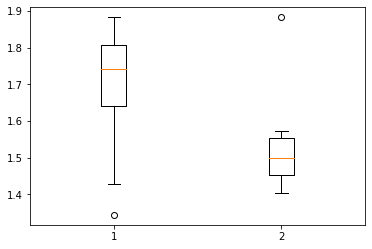

In [55]:
# df1, df2를 직접 입력
df1 = [1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]
df2 = [1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]

plot_data = (df1, df2)
ax = plt.boxplot(plot_data)
plt.show()



In [56]:
stats.levene(df1, df2)

LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

p-value가 0.51이므로 두 데이터의 집합의 분산이 다르다고 볼 수 없다.

In [57]:
# 2-Sample t-test
t_result = stats.ttest_ind(df1, df2, equal_var = True)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Smaple t-test의 t값 p값 출력
print("2-Sample t-test")
print("t검정통계량: {}".format(t))
print("p-value : {}".format(p))

2-Sample t-test
t검정통계량: 1.7
p-value : 0.111


유의수준 5%에서 검정결과 p값이 0.111이므로 고객간에 고객만족도의 차이가 있다고 볼 수 없다. 

## p.151[실습] Paired t-test
 - 회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [60]:
# df1, df2를 직접 입력
df1 = [720,589,780,648,720,589,780,648,780,648]
df2 = [710,580,787,712,750,600,782,670,790,680]

# Paired t-test
t_result = stats.ttest_rel(df1, df2)

# Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(4), t_result.pvalue.round(4)

print("Paired t-test")
print("t검정통계량: {}".format(t))
print("p-value : {}".format(p))

Paired t-test
t검정통계량: -2.2661
p-value : 0.0497


유의수준 5%에서 p-value 값이 0.497이므로 학원 수강 전후의 점수는 차이가 있다고 할 수 있다.

## p.157[실습] 1 Proportion test
- 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준 a=0.05로써 검정하라.
- 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.

In [61]:
count = 40
n_obs = 100
value = 0.5

# Proportion test 실행
stat, pval = proportions_ztest(count, n_obs, value)

# 1 Proportion test
print("1 Proportion test")
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

1 Proportion test
z:-2.041
p:0.041


1 Proportion test는 실제 률로 나타나는 집단에 대해 특정 비율과 같은이 검정하는 도구로 현재 p-value가 0.041로 유의수준 a=0.05에 비해 낮으므로 기존 대비 차이가 있다고 할 수 있다.

## p.160 2 Proportion test
 - 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
 - 두 공정의 불량률이 같다고 할 수 있는가?
 - 유의수준 = 0.05
 - 공장 A : N1 = 1200, X1 = 14
 - 공장 B : N2 = 1200, X2 = 5

In [62]:
count = np.array([14,5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count,nobs)

print('2 Proportion test')
print("z:{0:0.3f}".format(stat))
print("p:{0:0.3f}".format(pval))

2 Proportion test
z:2.073
p:0.038


p-value가 0.038로 유의수준 0.05 보다 작으므로 두 공장의 불량률은 차이가 있다고 할 수 있다.

## P.168[실습] 카이제곱 검정
 - 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복선택할 수 있도록 32명의 소비자를 대상으로 설문 조사한 Table이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가?(유의수준 0.05)
 

In [63]:
df = pd.DataFrame({'A':[18,1,8,7,10,9,10], 'B':[8,2,14,5,5,9,4], 'C':[4,1,3,4,9,5,4], 'D':[4,1,2,3,2,7,3], 'E':[3,1,3,1,1,1,1], 'F':[3,25,8,10,2,1,7]})
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print("chi-square test")
print('chisq: {0:0.3f}'.format(chi)) 
print('p: {0:0.3f}'.format(pval))
print('degree pf freedom: {}'.format(dof))
print('expected value:\n{}'.format(expected.round(3)))

chi-square test
chisq: 98.274
p: 0.000
degree pf freedom: 30
expected value:
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


각 제품에 대해 이므로 행을 제품으로 두고 각 제품에 대한 이미지를 순서대로 값을 넣어서 진행함. 유의수준 0.05에서 보았을 때 그보다 작으므로 각 제품에 대한 이미지에 차이가 있다고 할 수 있다.

## p.176[실습] One way ANOVA
 - 철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데, 강종별 2차정련 시간에 차이가 있는지 검정하세요.(유의수준 0.05)
 data set : ANOVA.csv

In [66]:
anova = pd.read_csv("./../data/ANOVA.csv", engine="python")

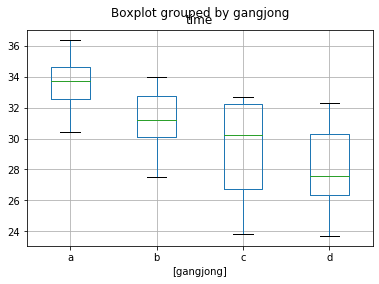

In [72]:
df = anova[['gangjong','time']]
df.boxplot(by='gangjong')

In [75]:
a = df['time'][df['gangjong']=='a']
b = df['time'][df['gangjong']=='b']
c = df['time'][df['gangjong']=='c']
d = df['time'][df['gangjong']=='d']
f_result = stats.f_oneway(a,b,c,d)
f,p = f_result.statistic.round(3), f_result.pvalue.round(3)
print("One way ANOVA")
print("F-value: {}".format(f.round(3)))
print("p-value: {}".format(p.round(3)))


One way ANOVA
F-value: 4.172
p-value: 0.019


ANOVA는 비교대상이 되는 집단들 간의 평균의 차이를 검정하기 위해 사용하며 P값이 0.019이므로 강종 간의 시간 차이가 있다고 할 수 있다.